# 1.0 Full Exploratory Data Analysis

In [2]:
# import previos notbook
%run 0-1-bryanascanoa-process_data.ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1777k  100 1777k    0     0  8331k      0 --:--:-- --:--:-- --:--:-- 8463k


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.5+ MB


c:\Users\ISSAC\anaconda3\envs\final_project\lib\site-packages\pandas_flavor\register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `jn.select` instead.
  return method(self._obj, *args, **kwargs)


## Explore data

### Read data

In [3]:
processed_covid_file = path.data_processed_dir("time_series_covid19_confirmed_global_processed.csv")

In [4]:
processed_covid_df = pd.read_csv(processed_covid_file)
processed_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330327 entries, 0 to 330326
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   country_region  330327 non-null  object
 1   date            330327 non-null  object
 2   value           330327 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 7.6+ MB


In [5]:
processed_covid_df.head()

,country_region,date,value
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0


### Explore data

In [6]:
sns.set_style("whitegrid")

In [7]:
processed_covid_df = (
    processed_covid_df
    .transform_column(
        "date",
        pd.to_datetime
    )
)

#### Appearance of new covid-19 cases in Latam

Subset data.

In [8]:
countries = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']
some_latam_countries_df = processed_covid_df.filter_on(f"country_region in {countries}")
some_latam_countries_df.head(3)

c:\Users\ISSAC\anaconda3\envs\final_project\lib\site-packages\pandas_flavor\register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.query` instead.
  return method(self._obj, *args, **kwargs)
c:\Users\ISSAC\anaconda3\envs\final_project\lib\site-packages\pandas_flavor\register.py:157: DeprecationWarning: This function will be deprecated in a 1.x release. Kindly use `pd.DataFrame.query` instead.
  return method(self._obj, *args, **kwargs)


,country_region,date,value
7,Argentina,2020-01-22,0
31,Brazil,2020-01-22,0
58,Chile,2020-01-22,0


Plot time series.

In [9]:
import final_project.visualization.visualize as visualize

c:\Users\ISSAC\anaconda3\envs\final_project\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ISSAC\anaconda3\envs\final_project\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ISSAC\anaconda3\envs\final_project\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ISSAC\anaconda3\envs\final_project\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

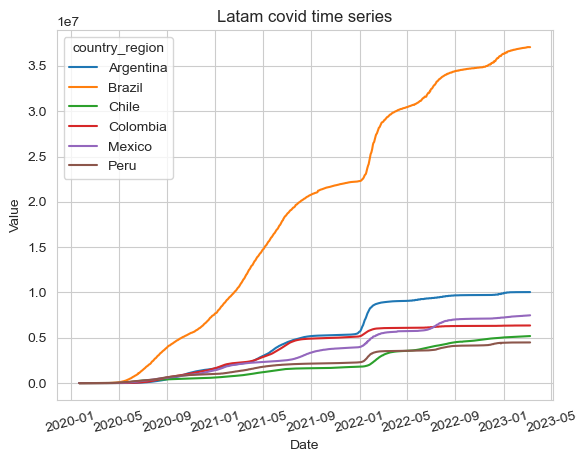

In [10]:
visualize.covid_times_series(some_latam_countries_df)

#### Latam in global context

Top `n` countries.

In [11]:
top_countries_df = visualize.top_countries_df_list(processed_covid_df, countries, 10)
top_countries_df

c:\Users\ISSAC\anaconda3\envs\final_project\lib\site-packages\pandas_flavor\register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `jn.select` instead.
  return method(self._obj, *args, **kwargs)


,country_region,value,color
0,US,53813184406,lightblue
1,India,29131119694,lightblue
2,Brazil,21182690594,red
3,France,16105911886,lightblue
4,Germany,13686043720,lightblue
5,United Kingdom,12118271679,lightblue
6,Russia,10578569842,lightblue
7,Italy,10083161678,lightblue
8,Turkey,8840742699,lightblue
9,"Korea, South",8467888968,lightblue


Plot to Latam in highlighted bars.

c:\Users\ISSAC\anaconda3\envs\final_project\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ISSAC\anaconda3\envs\final_project\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ISSAC\anaconda3\envs\final_project\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


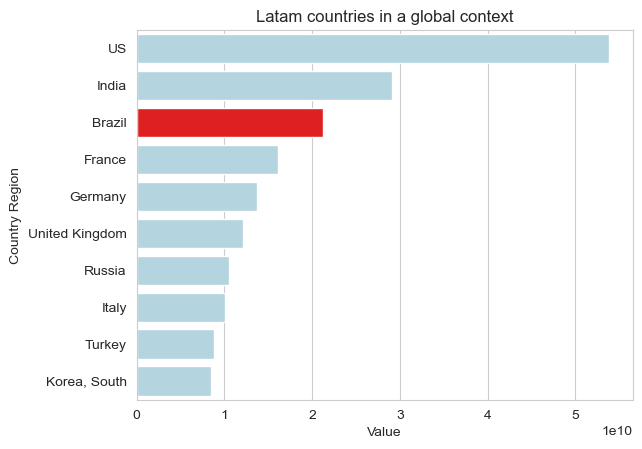

In [12]:
visualize.global_bar_latam(top_countries_df)